## Importing Necessary libraries

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

## Web Scrapping

### Creating a function to perform web scrapping for all the reviews

In [2]:
cust_name=[]
review_title=[]
Review_rating=[]
Review_content=[]
def createData(page_no):
    url = 'https://www.airlinequality.com/airline-reviews/british-airways/page/'+str(page_no)+'/?sortby=post_date%3ADesc&pagesize=100'
    page=requests.get(url).text
    soup=bs(page,'lxml')
    names=soup.find_all('span',itemprop='name')
    title=soup.find_all('h2',class_='text_header')
    rating=soup.find_all('div',itemprop='reviewRating')
    review=soup.find_all('div',{'class':'text_content'})
    
   
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    for i in range(0,len(title)):
        review_title.append(title[i].get_text())


    for i in range(0,len(rating)):
        Review_rating.append(rating[i].get_text())

    for i in range(0,len(review)):
        Review_content.append(review[i].get_text())
        
    Review_rating[:]=[rating.lstrip('\n') for rating in Review_rating]
    Review_rating[:]=[rating.rstrip('\n') for rating in Review_rating]
    Review_content[:]=[review.lstrip('✅ Trip Verified |') for review in Review_content]
    Review_content[:]=[review.lstrip('Not Verified |') for review in Review_content]

### Obtaining all the reviews

In [3]:
for x in range(1, 36):
    createData(x)

In [4]:
len(cust_name)

3500

In [5]:
len(review_title)

3500

In [6]:
len(Review_rating)

3495

In [7]:
len(Review_content)

3500

## Creating dataframe for the reviews

In [8]:
if(len(Review_content) !=  len(Review_rating)):
    missing_length = len(Review_content) - len(Review_rating)
    for x in range(0,missing_length):
        Review_rating.append("NA")
d={'Customer Name':cust_name,'Review title':review_title,'Rating':Review_rating,'Reviews':Review_content}
df=pd.DataFrame(d)
df

,Customer Name,Review title,Rating,Reviews
0,Srinivasan Balaji,"""Overall not a good airline""",2/10,Food was lousy. Who ever is planning the Asian...
1,P Patel,"""delayed and missed connecting flight""",1/10,Had the worst experience. The flight from Lond...
2,C Mayre,"""!not a good experience""",1/10,he ground staff were not helpful. Felt like al...
3,Kai Kohlberger,""" A very pleasant experience""",10/10,Second time BA Premium Economy in a newer airc...
4,Guadalupe Carlos-Alarcon,"""It was a nightmare""",2/10,hey changed our Flights from Brussels to Londo...
...,...,...,...,...
3495,Marlene Miller,British Airways customer review,NA,On a recent vacation from Sacramento to Paris ...
3496,Kathleen Osborne,British Airways customer review,NA,I should be in a nice hotel in Romania instead...
3497,Jeff Suykerbuyk,British Airways customer review,NA,2/5/2014 BRU-LHR-JFK. Short flight in business...
3498,S Snehal,British Airways customer review,NA,While different people have different experien...


In [9]:
df.head(50)

,Customer Name,Review title,Rating,Reviews
0,Srinivasan Balaji,"""Overall not a good airline""",2/10,Food was lousy. Who ever is planning the Asian...
1,P Patel,"""delayed and missed connecting flight""",1/10,Had the worst experience. The flight from Lond...
2,C Mayre,"""!not a good experience""",1/10,he ground staff were not helpful. Felt like al...
3,Kai Kohlberger,""" A very pleasant experience""",10/10,Second time BA Premium Economy in a newer airc...
4,Guadalupe Carlos-Alarcon,"""It was a nightmare""",2/10,hey changed our Flights from Brussels to Londo...
5,Patrick Sparks,"""Abysmal service""",5/10,At Copenhagen the most chaotic ticket counter ...
6,T Cayle,"""trained to give you the runaround""",1/10,Worst experience of my life trying to deal wit...
7,Andrew Pybus,"""they only had one choice of meal""",3/10,Due to code sharing with Cathay Pacific I was ...
8,M Edwards,"""relentless BA cost cutting""",4/10,LHR check in was quick at the First Wing and q...
9,Luis Rojas,"""I wouldn't recommend British Airways""",3/10,I wouldn't recommend British Airways at all. I...


## EDA

In [10]:
#Summarizing the overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  3500 non-null   object
 1   Review title   3500 non-null   object
 2   Rating         3500 non-null   object
 3   Reviews        3500 non-null   object
dtypes: object(4)
memory usage: 109.5+ KB


In [11]:
#Checking the null values in dataset
df.isnull().sum()

Customer Name    0
Review title     0
Rating           0
Reviews          0
dtype: int64

In [13]:
#Checking the duplicate values
df.duplicated().sum()

3

In [14]:
df[df.duplicated()]

,Customer Name,Review title,Rating,Reviews
2391,Richard Hodges,"""comfortable, if narrow, seats""",8/10,British Airways from Tampa to Gatwick on Boein...
2393,Richard Hodges,"""crummy Boeing 747s""",6/10,London Heathrow to Miami on one of British Air...
3402,A Mackenzie,British Airways customer review,6/10,CPH-LHR 26th June. Club Europe. BA standards a...


In [15]:
#Dropping duplicates
df=df.drop_duplicates()

In [16]:
df.shape

(3497, 4)

In [21]:
#Unique rating values 
df['Rating'].unique()

array(['2/10', '1/10', '10/10', '5/10', '3/10', '4/10', '9/10', '7/10',
       '8/10', '6/10', 'NA'], dtype=object)

In [23]:
#Count of Ratings
df['Rating'].value_counts()

1/10     777
2/10     400
3/10     391
8/10     353
10/10    315
7/10     304
9/10     303
4/10     236
5/10     230
6/10     183
NA         5
Name: Rating, dtype: int64

In [29]:
import numpy as np # linear algebra
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns

### Data Visualization & Drawing Inference

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

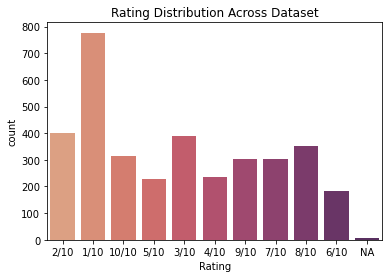

In [30]:
#Count of Ratings
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

#### Note:
* From above visual, we can say that count of ratings for 1 is comparatively much higher than the other rating scores. 
* Hence, we can say  for our data that most of the users are highly dissatisfied with their experience of the overall service of the airlines.

In [32]:
#Creating a new column length to find the length of the reviews
df['Length'] = df['Reviews'].apply(len)
df.head()

/var/folders/zb/_m7w330549jg0bb0mqg4hdl40000gn/T/ipykernel_1062/20215400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length'] = df['Reviews'].apply(len)


,Customer Name,Review title,Rating,Reviews,Length
0,Srinivasan Balaji,"""Overall not a good airline""",2/10,Food was lousy. Who ever is planning the Asian...,525
1,P Patel,"""delayed and missed connecting flight""",1/10,Had the worst experience. The flight from Lond...,663
2,C Mayre,"""!not a good experience""",1/10,he ground staff were not helpful. Felt like al...,363
3,Kai Kohlberger,""" A very pleasant experience""",10/10,Second time BA Premium Economy in a newer airc...,525
4,Guadalupe Carlos-Alarcon,"""It was a nightmare""",2/10,hey changed our Flights from Brussels to Londo...,716


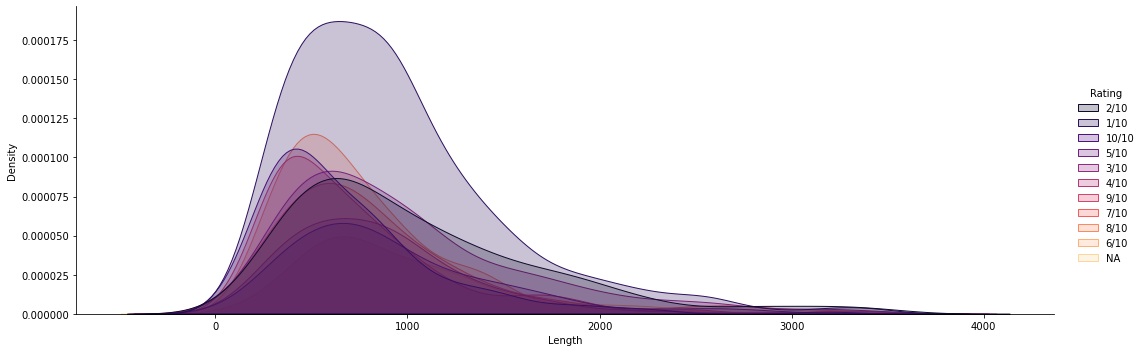

In [33]:
#creating distribution plot for Rating across the dataset
sns.displot(data=df, x='Length', hue='Rating', palette='magma', kind='kde', fill=True, aspect=3)

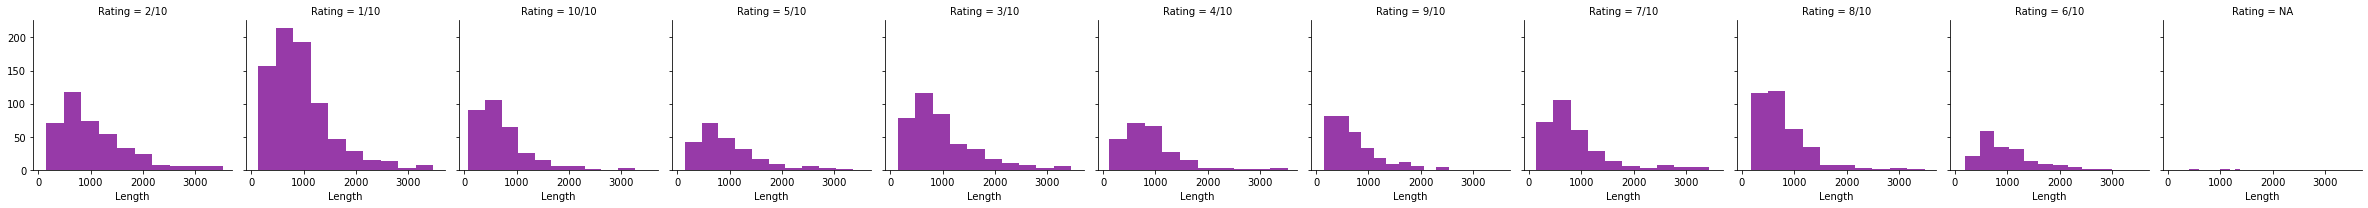

In [34]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Length', color='#973aa8')

<AxesSubplot:xlabel='Rating', ylabel='Length'>

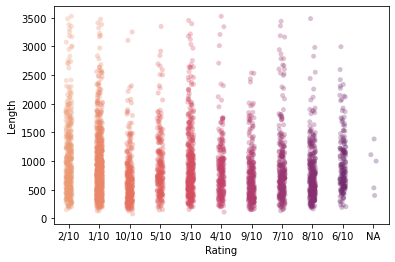

In [35]:
#stripplot
sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

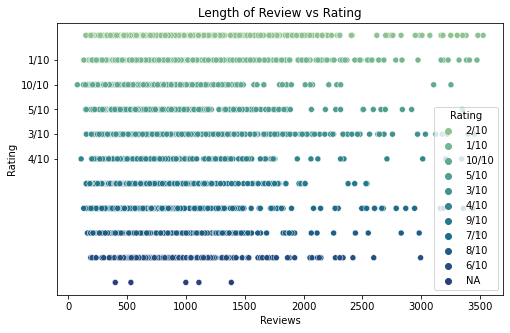

In [45]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Reviews'].apply(len), y=df['Rating'], data=df, palette='crest', hue='Rating')
plt.title('Length of Review vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

#### Note:
* From above visual, we can say that the length of review has an effect on ratings.
* Lower ratings have higher length of review compared to top ratings.
* Hence, there exists a negative correlation between Length of Reviews & Ratings.

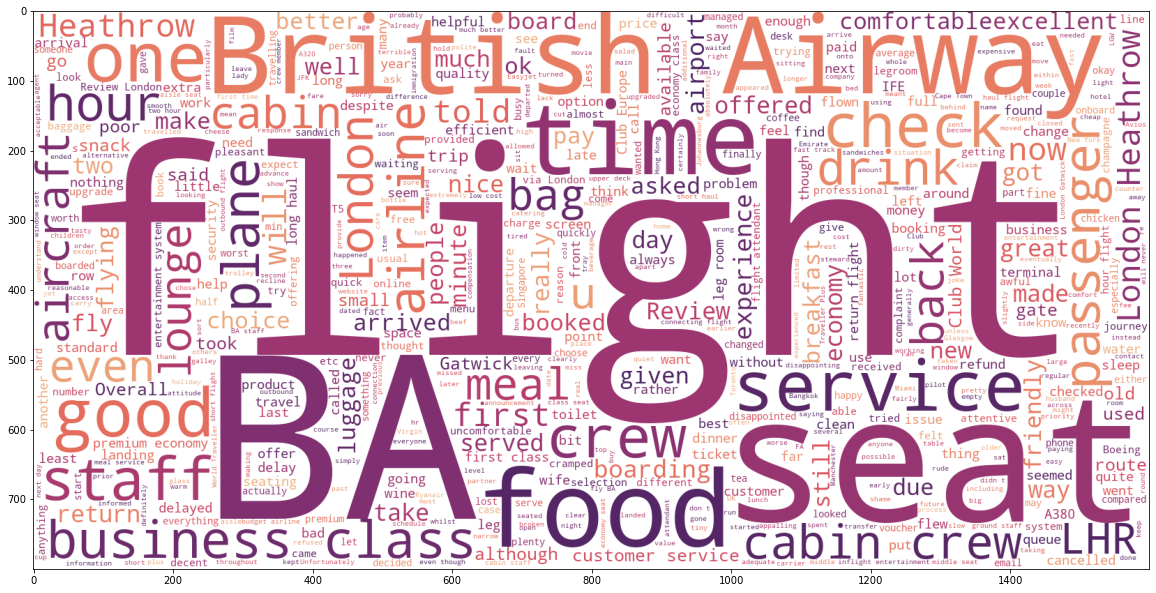

In [44]:
#Plotting the wordcloud on original data for all ratings
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=1600,background_color="white", colormap='flare').generate(' '.join(df['Reviews']))

plt.imshow(wc)

#### Note:
* Flight, Seat, time, business class,food, staff,cabin crew, passenger, & service etc. are most commonly used words in overall reviews by customers.